<a href="https://colab.research.google.com/github/BoomerPython/Week_4/blob/main/DSA_BoomerPython_Week4_MatPlotLib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Visualizing Baseball Attendance Data
# Based on Miller (2015)

# Import packages for analysis and modeling
import numpy as np
import pandas as pd

# Import packages for plotting

import matplotlib.pyplot as plt
import seaborn as sns


The following examples are explatory data analysis of Dodgers' attendance data.  Based on a case study from Thomas Miller's *Modeling Techniques in Predictive Analytics with Python*, the code below uses MatPlotLib and Seaborn to demonstrate some basic visualizations.



The basic goal is to determine how to increase attendance at the games.  Is it as simple as handing out bobbleheads?


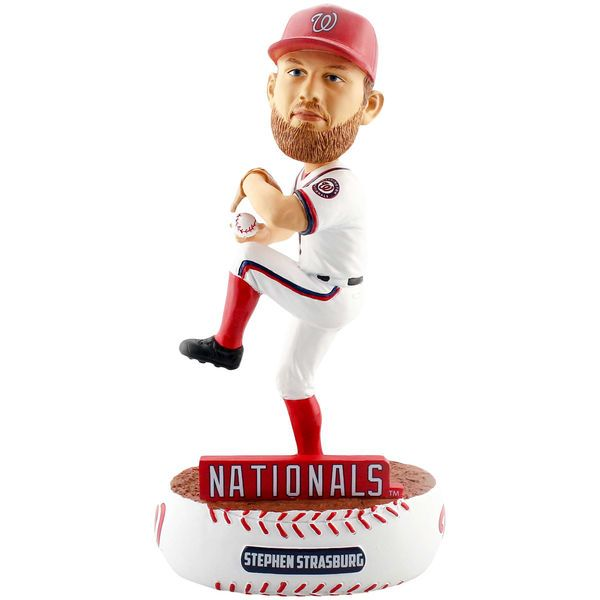

In [2]:
# OBTAIN - THERE ARE MANY WAYS TO READ DATA INTO COLAB
# THIS IS ONE - ASSUMES YOU HAVE DATA STORED WHERE YOU CAN ACCESS IT

dodgers = pd.read_csv('https://raw.githubusercontent.com/2SUBDA/Block1_Crawl/Week_2/dodgers.csv')

# examine the structure of the data frame
print("\nContents of dodgers data frame ---------------")

print(pd.DataFrame.head(dodgers))


Contents of dodgers data frame ---------------
  month  day  attend day_of_week  ... cap  shirt fireworks bobblehead
0   APR   10   56000     Tuesday  ...  NO     NO        NO         NO
1   APR   11   29729   Wednesday  ...  NO     NO        NO         NO
2   APR   12   28328    Thursday  ...  NO     NO        NO         NO
3   APR   13   31601      Friday  ...  NO     NO       YES         NO
4   APR   14   46549    Saturday  ...  NO     NO        NO         NO

[5 rows x 12 columns]


In [8]:
# SCRUB - The following data manipulation is used to help with presenting the 
# data in a meaningful way

# attendance in thousands for plotting 
dodgers['attend_000'] = dodgers['attend']/1000

# a little manipulation of the days of week
mondays = dodgers[dodgers['day_of_week'] == 'Monday']
tuesdays = dodgers[dodgers['day_of_week'] == 'Tuesday']
wednesdays = dodgers[dodgers['day_of_week'] == 'Wednesday']
thursdays = dodgers[dodgers['day_of_week'] == 'Thursday']
fridays = dodgers[dodgers['day_of_week'] == 'Friday']
saturdays = dodgers[dodgers['day_of_week'] == 'Saturday']
sundays = dodgers[dodgers['day_of_week'] == 'Sunday']

# convert days' attendance into list of vectors for box plot
data = [mondays['attend_000'], tuesdays['attend_000'], 
    wednesdays['attend_000'], thursdays['attend_000'], 
    fridays['attend_000'], saturdays['attend_000'], 
    sundays['attend_000']]
ordered_day_names = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']

# a little manipulation in case we want to see the list of opponents
# in order
ordered_team_names = (sorted(set(dodgers['opponent']), reverse = True))

# How might we order the days of week to something we are familiar with?

In [5]:
# EXPLORE - Summary Statistics

print(np.mean(dodgers['attend']))
# np.min(dodgers['attend'])
# np.max(dodgers['attend'])

# How many promotions did we have for boobleheads?

bob = np.count_nonzero(dodgers['bobblehead'])
print(bob)

41040.07407407407
81


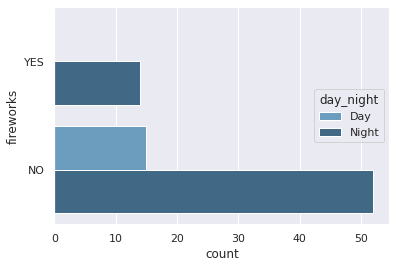

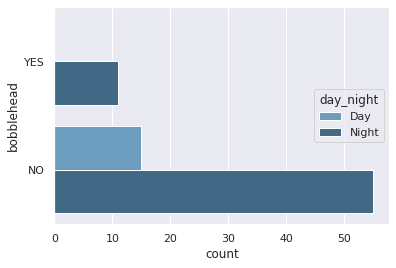

In [15]:
# EXPLORE - Remember just because you can - does not mean you should.
# Promotions by type

sns.countplot(y="fireworks", hue="day_night",
              data=dodgers, palette="Blues_d",
              order=["YES", "NO"])
#g.add_legend();
plt.show()

sns.countplot(y="bobblehead", hue="day_night",
                data=dodgers, palette="Blues_d",
                order=["YES", "NO"])
#g.add_legend();
plt.show()

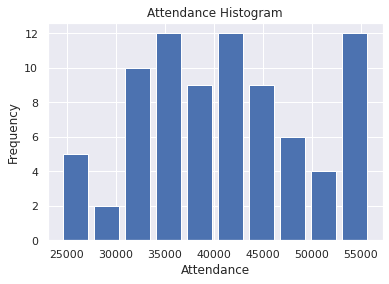

In [17]:
# EXPLORE - Create a histogram of attendance

plt.hist(dodgers['attend'], density = False, stacked = False, rwidth = .8)
plt.title("Attendance Histogram")
plt.xlabel('Attendance')
plt.ylabel('Frequency')

plt.show()

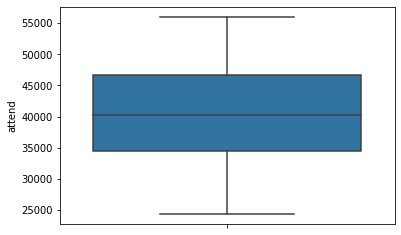

In [9]:
# EXPLORE - What about a box plot?

sns.boxplot(y="attend", data=dodgers)
plt.show()


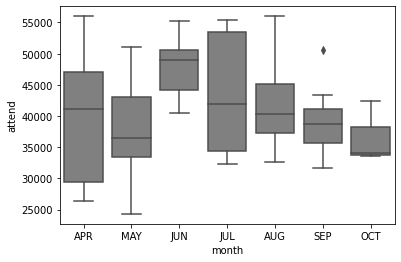

In [11]:
# EXPLORE - what about a box plot conditioned on month of the year?

sns.boxplot(x="month", y="attend", data=dodgers, color = "gray")
plt.show()

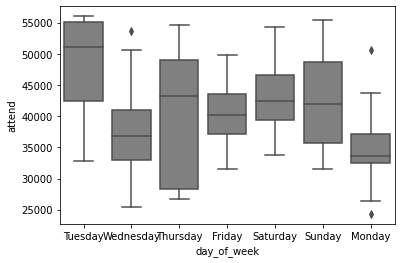

In [10]:
# EXPLORE - What about a box plot conditioned on the day of the week?

sns.boxplot(x="day_of_week", y="attend", data=dodgers, color = "gray");
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.
  from ipykernel import kernelapp as app


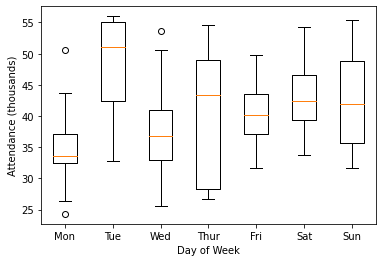

In [12]:
# EXPLORE - Can we make this a little better?

fig, axis = plt.subplots()
axis.set_xlabel('Day of Week')
axis.set_ylabel('Attendance (thousands)')
day_plot = plt.boxplot(data, sym='o', vert=1, whis=1.5)
plt.setp(day_plot['boxes'], color = 'black')    
plt.setp(day_plot['whiskers'], color = 'black')    
plt.setp(day_plot['fliers'], color = 'black', marker = 'o')
axis.set_xticklabels(ordered_day_names)
#plt.show()
plt.savefig('fig_advert_promo_dodgers_eda_day_of_week_Python.pdf', 
    bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
    orientation='portrait', papertype=None, format=None, 
    transparent=True, pad_inches=0.25, frameon=None) 
plt.show()

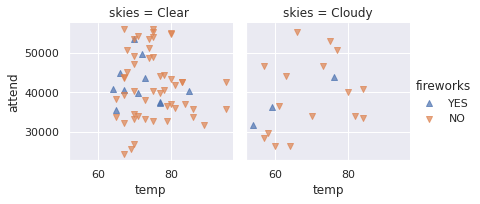

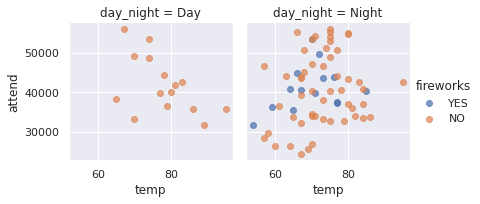

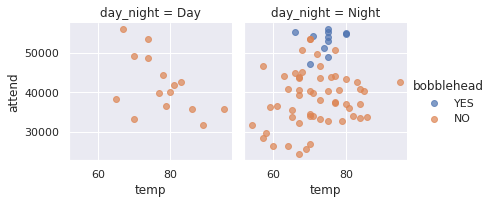

In [13]:
# EXPLORE - What about small multiples? 
# Remember the point of the chart is to tell a story OR to find a pattern in 
# the data that might be helpful for modeling

# Trellis/lattice plot attendance by temp, conditioning on skies 
# and day_night with bobblehead NO/YES shown in distinct colors

sns.set(style="darkgrid")

g = sns.FacetGrid(dodgers, col="skies", hue="fireworks", 
                  hue_order=["YES", "NO"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="fireworks",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

g = sns.FacetGrid(dodgers, col="day_night", hue="bobblehead",
                hue_order=["YES", "NO"],)
g.map(plt.scatter, "temp", "attend", alpha=.7)
g.add_legend();
plt.show()

We can see a somewhat negative relationship between temp and attendance.

We can also see that, collectively, the games with bobblehead promotions 
appear to have larger attendance.

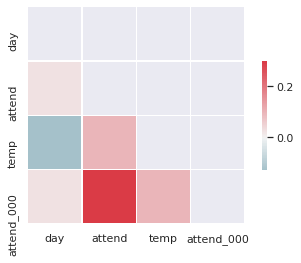

In [20]:
# EXPLORE - Create a heatmap of correlation
# What other variables might have a relationship with attendance?

corr = dodgers.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 22.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


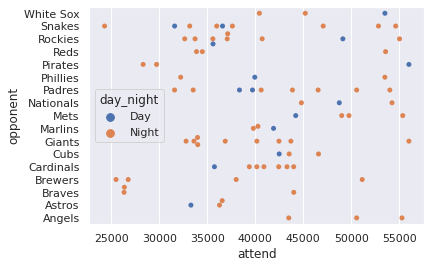

In [16]:
# EXPLORE - Dodgers attendance by visiting team
# Figure 2.4 from Miller (2015)

# teams = sorted(["opponent"], reverse=True)
sns.swarmplot(x="attend", y="opponent", hue="day_night", 
              data=dodgers, order =ordered_team_names)
#g.add_legend();
plt.show()